In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=100,epochs=25,verbose=1,validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 3s 5ms/step - loss: 0.0275 - accuracy: 0.9923 - val_loss: 0.0772 - val_accuracy: 0.9772
Epoch 2/25
480/480 [==============================] - 2s 5ms/step - loss: 0.0204 - accuracy: 0.9946 - val_loss: 0.0772 - val_accuracy: 0.9779
Epoch 3/25
480/480 [==============================] - 2s 5ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.0778 - val_accuracy: 0.9795
Epoch 4/25
480/480 [==============================] - 2s 5ms/step - loss: 0.0139 - accuracy: 0.9967 - val_loss: 0.0861 - val_accuracy: 0.9764
Epoch 5/25
480/480 [==============================] - 3s 5ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.0949 - val_accuracy: 0.9743
Epoch 6/25
480/480 [==============================] - 2s 5ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0913 - val_accuracy: 0.9758
Epoch 7/25
480/480 [==============================] - 2s 5ms/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.0842 - val_accuracy: 0.9787
Epoch 

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9798

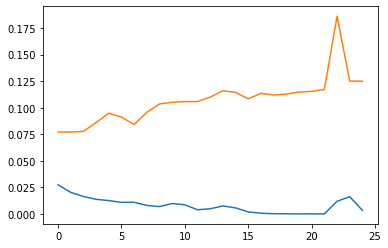

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

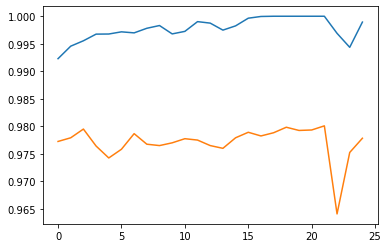

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
